# CS360

### Instructions
0. Remember to comment.  If your code fails to perform the task at hand but your comments are describing proper code execution I can award a substanial amount of points for logical errors in your program.  Think of comments as the equivalent of showing your work in a math class.
1. Read all instructions carefully, ask questions if anything is confusing.  
2. Fill in the code/text blocks to answer each question.
3. Do **not** change any of the existing code provided.  The code is specifically there to help you!
4. Run the entire notebook *before* submitting it on Sakai to make sure that the code actually runs without errors.
5. **Important**: Any question for which your code fails to run will receive 0 points.
6. Have fun!
7. DO NOT USE ANY PACKAGES, other than the ones I have imported.  Part of learning is to struggle through the "hard way" before getting to do things the easy way.  Any packages I have imported are fair game and you may use any functions unless otherwise specified.  If I've imported them after a function, I've deliberately made it so you cannot retroactively use them in an earlier problem.
8. If I've used return(None) for a function, you may definitely change the return type.  It's just a placeholder
9. While you may discuss the concepts of the problems with your peers your code will need to be yours and yours alone.
10. Replace CS497 with your BUID (ie if I was turning in this assignment my file would be called dbrennan_HW#2).  

# This assignment will be based on Conway's game of life (not the Milton Bradley Game!)

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

I have handled everything...except the logic for determining if a cell is alive or dead.  We are using numpy arrays to store 1's and 0's with 1 being considered alive and 0 being considered dead.

**The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, alive or dead, (or populated and unpopulated, respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:**

**Any live cell with fewer than two live neighbours dies, as if by underpopulation.**

**Any live cell with two or three live neighbours lives on to the next generation.**

**Any live cell with more than three live neighbours dies, as if by overpopulation.**

**Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.**

Since we let the user choose the size of the matrix we are working with, we clearly have a finite grid.  To make this seem "infinite" cells at the edge of the array "see" the cells on the other side.  **Not handling this will lose you a good deal of points!**




In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

global_list = []

def update_plot(array, figsize=(7,5), title=''):
    clear_output(wait=False)
    plt.figure(figsize=figsize)
    plt.imshow(array,cmap="gray")
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Remember alive is white, dead is black')
    plt.show();

In [8]:
def startup(random_percent=None,predefined_board=None):
    if predefined_board is None:
        size_to_build = input("enter the size of your game of life\n")
        dimension = int(size_to_build)
    ##Build the game board, bias is an optional parameter you can pass the function
    if random_percent is None and predefined_board is None:
        game_board = np.random.randint(2,size=(dimension,dimension))
        return game_board
    else:
        if predefined_board is None:
            game_board = np.arange(dimension**2)
            #In place shuffle
            np.random.shuffle(game_board)
            #Grab number we should make alive
            alive = int(np.floor(len(game_board)*random_percent)*1/100)
            #Set those elements to be alive
            zeros = np.zeros(dimension**2)
            alive_cells = game_board[0:alive:1]
            zeros[alive_cells]=1
            game_board = zeros.reshape(dimension,-1)
            return game_board
        else:
            return predefined_board


In [9]:
def check_if_pattern(board):
    ##We need a copy (remember shallow vs deep?)
    board_copy = np.copy(board)
    add_to_list = True
    saved_idx = -1
    
    for idx,board_state in enumerate(global_list):
        ##Values are same boardwise means we have an oscillating pattern
        if np.array_equal(board_state,board_copy):
            add_to_list = False
            saved_idx = idx
            break
            
    if add_to_list == True:
        global_list.append(board_copy)
    
    return saved_idx
        

In [10]:
def game_of_life(test_board = None,bias=None):
    if test_board is None:
        start_board = startup(random_percent=bias)
    else:
        start_board = startup(predefined_board=test_board)
    ##Clear global list from previous runs
    global_list.clear()
    global_list.append(start_board)
    
    board = start_board
    count = 0
    not_stable = True
    all_dead = False
    
    
    while not_stable == True:
        title_plot="This is iteration number: " + str(count) + " since you have started"
        update_plot(board,title=title_plot)
        prev_board = board
        board = update_game_board(board)
       
    
        idx=check_if_pattern(board)
        
        if idx != -1:
            not_stable = False
        
        all_zero = np.zeros(board.shape[0]**2).reshape(board.shape[0],-1)
        
        if np.array_equal(all_zero,board):
            all_dead = True
            not_stable = False
            
        sleep(.25)
        count+=1
    
    if all_dead == True:
        print("Everything has died :( after",count,"iterations")
    elif not_stable == False:
        print("Stable game conditions reached after:",count,"iterations, with a period of:",len(global_list)-idx)

    
    

In [33]:
##This is where all your lab code goes!
def update_game_board(input_board):
    #It's annoying typing that everytime so there ya go
    X = len(input_board)
    
    #We want a deep copy, not a shallow
    newer_board = input_board.copy()
    
    #2D array = matrix so we double iterate over the length
    for i in range(X):
        for j in range(X):           
            # the general "Toroidal Rule" for implementation with a computer program to know how to 
            # basically act as a "Circular Array" which means, when we hit the end of the user given
            # X by X game board, when we reach the edges we know how to act as if the game board was
            # Wrapped around on itself like a full geometrical shape.
            DEADorALIVEsucka = int(input_board[i,(j+1)%X] + input_board[i,(j-1)%X] + input_board[(i+1)%X, j]
                        + input_board[(i-1)%X, j] + input_board[(i-1)%X, (j-1)%X] + input_board[(i-1)%X, (j+1)%X]
                        + input_board[(i+1)%X, (j-1)%X] + input_board[(i+1)%X, (j+1)%X])
            
            # Are we living? Are we coming back to life? Are we remaining dead? 
            if input_board[i,j] == 1:
                if DEADorALIVEsucka < 2 or DEADorALIVEsucka > 3:
                    
                    #He's 6 feet under boys
                    newer_board[i,j] = 0
            else:
                # RESURRECTION!!!!!! As name suggests, this is the condition we need for a cell to be reborn
                if DEADorALIVEsucka == 3:
                    newer_board[i,j] = 1
                    
    # Updating our game board per iteration
    input_board[:] = newer_board[:]
    return newer_board



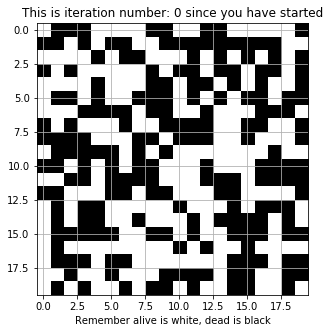

Stable game conditions reached after: 1 iterations, with a period of: 1


In [34]:
##### Play the game!
game_of_life()

# Below are some test cases, these are based on some famous game of life board states

In [35]:
x = 17
pulsar = np.zeros(x**2)
pulsar=pulsar.reshape(x,-1)
##Build the famous pulsar!  It will oscillate over a period of 3
pulsar[2][4],pulsar[2][5],pulsar[2][6],pulsar[2][10],pulsar[2][11],pulsar[2][12] = 1,1,1,1,1,1
pulsar[4][2],pulsar[4][7],pulsar[4][9],pulsar[4][14] = 1,1,1,1
pulsar[5][2],pulsar[5][7],pulsar[5][9],pulsar[5][14] = 1,1,1,1
pulsar[6][2],pulsar[6][7],pulsar[6][9],pulsar[6][14] = 1,1,1,1
pulsar[7][4],pulsar[7][5],pulsar[7][6],pulsar[7][10],pulsar[7][11],pulsar[7][12] = 1,1,1,1,1,1
pulsar[9][4],pulsar[9][5],pulsar[9][6],pulsar[9][10],pulsar[9][11],pulsar[9][12] = 1,1,1,1,1,1
pulsar[10][2],pulsar[10][7],pulsar[10][9],pulsar[10][14] = 1,1,1,1
pulsar[11][2],pulsar[11][7],pulsar[11][9],pulsar[11][14] = 1,1,1,1
pulsar[12][2],pulsar[12][7],pulsar[12][9],pulsar[12][14] = 1,1,1,1
pulsar[14][4],pulsar[14][5],pulsar[14][6],pulsar[14][10],pulsar[14][11],pulsar[14][12] = 1,1,1,1,1,1



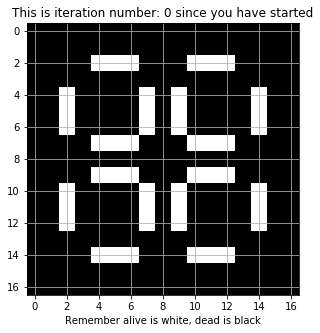

Stable game conditions reached after: 1 iterations, with a period of: 1


In [36]:
game_of_life(test_board=pulsar)

In [37]:
x = 15
new_board_test = np.zeros(x**2)
new_board_test=new_board_test.reshape(x,-1)
##Build the famous diehard!  It will die off after 130 iterations
new_board_test[2,9]=1
new_board_test[3][3],new_board_test[3][4]=1,1
new_board_test[4,4],new_board_test[4,8],new_board_test[4,9],new_board_test[4,10] = 1,1,1,1


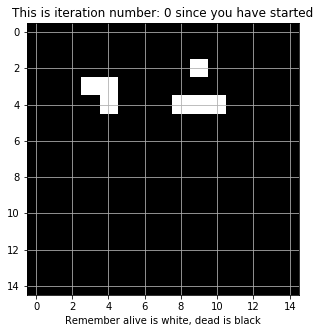

Stable game conditions reached after: 1 iterations, with a period of: 1


In [38]:
game_of_life(test_board=new_board_test)

In [39]:
x = 15
glider = np.zeros(x**2)
glider=glider.reshape(x,-1)
##Build the famous glider!  It will keep flying forever!  Period is dependent on board size
glider[0][1]=1
glider[1][2]=1
glider[2][0],glider[2][1],glider[2][2] = 1,1,1

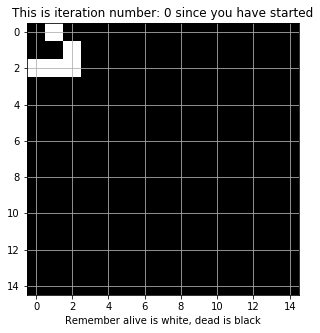

Stable game conditions reached after: 1 iterations, with a period of: 1


In [40]:
game_of_life(test_board=glider)